In [48]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn
import statsmodels.formula.api as smf

pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 100)

In [49]:
filepath = "/mnt/d/temp/user/ed/mart/mmplastic/Marine_Microplastics_WGS84_1130715472761438990.csv"

In [50]:
df = pd.read_csv(filepath)

In [51]:
df

,OBJECTID,Oceans,Regions,SubRegions,Sampling Method,Measurement,Unit,Density Range,Density Class,Short Reference,Long Reference,DOI,Organization,Keywords,Accession Number,Accession Link,Latitude,Longitude,Date,GlobalID,x,y
0,9676,Atlantic Ocean,NaN,NaN,Grab sample,0.0180,pieces/m3,0.005-1,Medium,Barrows et al.2018,"Barrows, A.P.W., S.E. Cathey, C.W. Petersen. 2...",https://doi.org/10.1016/j.envpol.2018.02.062,Adventure Scientist,Adventure Scientist/Citizen Science,211009,https://www.ncei.noaa.gov/access/metadata/land...,-31.696000,-48.560000,8/11/2015 12:00:00 AM,a77121b2-e113-444e-82d9-7af11d62fdd2,-48.560000,-31.696000
1,6427,Pacific Ocean,NaN,NaN,Neuston net,0.0000,pieces/m3,0-0.0005,Very Low,Law et al.2014,"Law, K.L, S.K. Morét-Ferguson, D.S. Goodwin, E...",https://doi.org/10.1021/es4053076,Sea Education Association,SEA,211008,https://www.ncei.noaa.gov/access/metadata/land...,6.350000,-121.850000,12/18/2002 12:00:00 AM,be27c450-02ca-4261-8d89-cae21108e6cc,-121.850000,6.350000
2,10672,Pacific Ocean,NaN,NaN,Manta net,0.0130,pieces/m3,0.005-1,Medium,Goldstein et al.2013,"Goldstein, M.C., A.J. Titmus, M. Ford. 2013. S...",https://doi.org/10.1371/journal.pone.0080020,Scripps Institution of Oceanography-University...,Great Pacific Garbage Patch/SEAPLEX,253448,https://www.ncei.noaa.gov/access/metadata/land...,0.500000,-95.350000,10/17/2006 12:00:00 AM,23effcdd-35b7-4e1e-adb4-390693a287d3,-95.350000,0.500000
3,13921,Atlantic Ocean,NaN,NaN,Aluminum bucket,1368.0000,pieces/m3,>=10,Very High,Queiroz et al.2022,"Queiroz, A.F.dos S., A.S. da Conceição, D. Che...",https://doi.org/10.1016/j.scitotenv.2022.156259,"Federal University of Pará, Brazil",Amazon Continental Shelf,276482,https://www.ncei.noaa.gov/access/metadata/land...,0.631825,-45.398158,10/17/2018 12:00:00 AM,16d77822-0533-4116-97b9-0bdb592f3d6e,-45.398158,0.631825
4,9344,Pacific Ocean,NaN,NaN,Grab sample,0.0010,pieces/m3,0.0005-0.005,Low,Barrows et al.2018,"Barrows, A.P.W., S.E. Cathey, C.W. Petersen. 2...",https://doi.org/10.1016/j.envpol.2018.02.062,Adventure Scientist,Adventure Scientist/Citizen Science,211009,https://www.ncei.noaa.gov/access/metadata/land...,16.623000,-99.697800,1/3/2015 12:00:00 AM,b9e435e3-9e86-4143-8b51-877e5dcdc7a6,-99.697800,16.623000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20419,9366,Atlantic Ocean,NaN,NaN,Grab sample,0.0110,pieces/m3,0.005-1,Medium,Barrows et al.2018,"Barrows, A.P.W., S.E. Cathey, C.W. Petersen. 2...",https://doi.org/10.1016/j.envpol.2018.02.062,Adventure Scientist,Adventure Scientist/Citizen Science,211009,https://www.ncei.noaa.gov/access/metadata/land...,17.100000,-47.550000,2/1/2015 12:00:00 AM,fd4db6d6-aed7-48b1-a22b-402557112e2f,-47.550000,17.100000
20420,4683,Atlantic Ocean,Caribbean Sea,NaN,Neuston net,0.0216,pieces/m3,0.005-1,Medium,Law et al.2010,"Law, K.L., S. Morét-Ferguson, N.A. Maximenko, ...",https://doi.org/10.1126/science.1192321,Sea Education Association,SEA,211007,https://www.ncei.noaa.gov/access/metadata/land...,21.390000,-81.960000,3/14/2001 12:00:00 AM,83a8208e-2d06-4ad9-bcd9-81e29d57e0aa,-81.960000,21.390000
20421,6043,Atlantic Ocean,NaN,NaN,Neuston net,0.0000,pieces/m3,0-0.0005,Very Low,Law et al.2010,"Law, K.L., S. Morét-Ferguson, N.A. Maximenko, ...",https://doi.org/10.1126/science.1192321,Sea Education Association,SEA,211007,https://www.ncei.noaa.gov/access/metadata/land...,24.140000,-81.980000,5/1/2008 12:00:00 AM,0fd72d83-cd27-42e1-b63a-b015c23b28d2,-81.980000,24.140000
20422,20169,Atlantic Ocean,NaN,NaN,Hand picking,NaN,pieces/10 mins,40-200,High,Tunnell et al. 2020,"Tunnell, Jace W.; Dunning, Kelly H.; Scheef, L...",https://doi.org/10.1016/j.marpolbul.2019.110794,University of Texas Marine Science Institute,Nurdle Patrol,259486,https://www.ncei.noaa.gov/access/metadata/land...,39.924800,-75.127200,10/28/2021 12:00:00 AM,fc84069e-c782-4c3d-bf6b-265535969d8e,-75.127200,39.924800


In [52]:
df.groupby("Regions").size()

Regions
Baffin Bay                                                        7
Baltic Sea                                                       14
Barents Sea                                                       2
Bay of Biscay                                                    11
Bay of Fundy                                                      1
Beaufort Sea                                                      2
Bering Sea                                                        1
Black Sea                                                        10
Caribbean Sea                                                  1886
Celtic Sea                                                       48
Channel Islands National Marine Sanctuary                         3
Chukchi Sea                                                       1
Coastal Waters of Florida                                        15
Coastal Waters of Southeast Alaska and British Columbia          46
Davis Strait                            

In [53]:
df = df.dropna(subset=["Measurement"])

In [54]:
df['yyyymmdd'] = pd.to_datetime(df['Date'])
df['year'] = df['yyyymmdd'].dt.year
df['month'] = df['yyyymmdd'].dt.month
df['day'] = df['yyyymmdd'].dt.day

/tmp/ipykernel_216272/3844149097.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['yyyymmdd'] = pd.to_datetime(df['Date'])
/tmp/ipykernel_216272/3844149097.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['yyyymmdd'] = pd.to_datetime(df['Date'])
/tmp/ipykernel_216272/3844149097.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year'] = df['yyyymmdd'].d

In [55]:
df.groupby("Density Class").size()

Density Class
High         1139
Low          1874
Medium       6562
Very High     414
Very Low     4623
dtype: int64

# Measurment normalization over ```Oceans```

In [56]:
df.groupby("Oceans").agg({"Measurement": ['min', 'max', 'mean', 'std']})

Measurement                                        
                       min            max        mean          std
Oceans                                                            
Arctic Ocean           0.0     375.000000    9.159280    35.672000
Atlantic Ocean         0.0  110480.000000  187.443584  2604.061869
Indian Ocean           0.0      46.000000    2.752309    11.144798
Pacific Ocean          0.0   21156.558533  110.030351   740.636458

In [57]:
df.groupby("Oceans")['Measurement'].quantile([0.25, 0.5, 0.75, 0.9, 0.95, 0.99])

Oceans              
Arctic Ocean    0.25       0.007000
                0.50       0.049755
                0.75       1.000000
                0.90      21.000000
                0.95      44.100000
                0.99     152.370000
Atlantic Ocean  0.25       0.000000
                0.50       0.009000
                0.75       0.089850
                0.90       1.185596
                0.95      30.510000
                0.99    2725.518300
Indian Ocean    0.25       0.009596
                0.50       0.025293
                0.75       0.111713
                0.90       0.146571
                0.95       9.336756
                0.99      38.667351
Pacific Ocean   0.25       0.000000
                0.50       0.004644
                0.75       0.467188
                0.90       4.250340
                0.95      16.995047
                0.99    3526.093089
Name: Measurement, dtype: float64

In [58]:
df["measurement"] = np.where(df["Measurement"] > 1.0, 1.0, df["Measurement"])

/tmp/ipykernel_216272/354482019.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["measurement"] = np.where(df["Measurement"] > 1.0, 1.0, df["Measurement"])


<Axes: xlabel='measurement', ylabel='Count'>

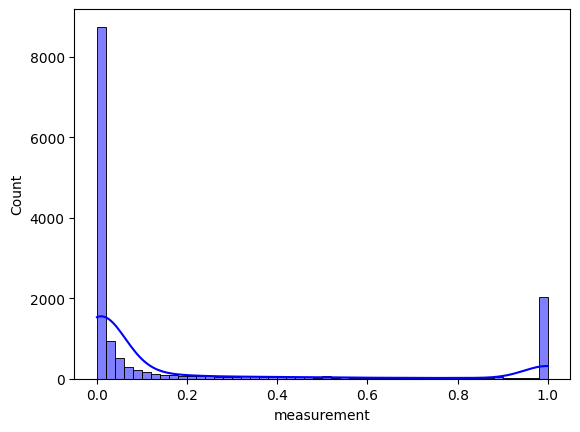

In [59]:
seaborn.histplot(
    data=df,
    x="measurement",
    bins=50,
    kde=True,
    color="blue",
    alpha=0.5,
)

In [60]:
df["measurement"].describe()

count    14612.000000
mean         0.196110
std          0.356821
min          0.000000
25%          0.000000
50%          0.008640
75%          0.128354
max          1.000000
Name: measurement, dtype: float64

In [61]:
# df["log_measurement"] = np.where(df["measurement"] > 0.0, np.log(df["measurement"]), -7.5)
df["log_measurement"] = np.log(df["measurement"])

/home/ed/miniconda3/envs/mypy311/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/tmp/ipykernel_216272/706033430.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["log_measurement"] = np.log(df["measurement"])


In [62]:
df["log_measurement"]

0       -4.017384
1            -inf
2       -4.342806
3        0.000000
4       -6.907755
           ...   
20418        -inf
20419   -4.509860
20420   -3.835062
20421        -inf
20423   -1.120858
Name: log_measurement, Length: 14612, dtype: float64

In [63]:
df["log_measurement"].describe()

/home/ed/miniconda3/envs/mypy311/lib/python3.11/site-packages/pandas/core/nanops.py:1010: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
/home/ed/miniconda3/envs/mypy311/lib/python3.11/site-packages/numpy/lib/function_base.py:4655: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


count    1.461200e+04
mean             -inf
std               NaN
min              -inf
25%               NaN
50%     -4.751353e+00
75%     -2.052961e+00
max      0.000000e+00
Name: log_measurement, dtype: float64

<Axes: xlabel='log_measurement', ylabel='Count'>

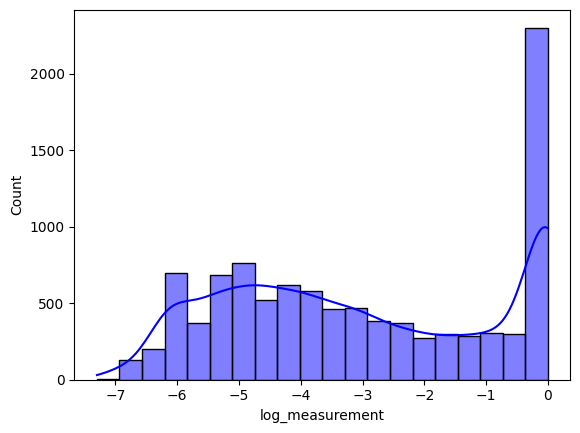

In [64]:
seaborn.histplot(
    data=df,
    x="log_measurement",
    bins=20,
    kde=True,
    color="blue",
    alpha=0.5,
)

In [65]:
df["log_measurement"].quantile(0.3155), df["log_measurement"].quantile(0.1), df["log_measurement"].quantile(0.86)

/home/ed/miniconda3/envs/mypy311/lib/python3.11/site-packages/numpy/lib/function_base.py:4657: RuntimeWarning: invalid value encountered in add
  lerp_interpolation = asanyarray(add(a, diff_b_a * t, out=out))
/home/ed/miniconda3/envs/mypy311/lib/python3.11/site-packages/numpy/lib/function_base.py:4655: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


(-inf, nan, -0.024470811007744744)

In [66]:
def find_quantile_below_threshold(df, column, threshold, quantile_range=(0, 1, 0.005)):
  """
  Finds the highest quantile value less than a given threshold in a Pandas DataFrame column.

  Args:
    df: The Pandas DataFrame.
    column: The name of the column to check.
    threshold: The threshold value.
    quantile_range: A tuple defining the start, end, and step of the quantile range.

  Returns:
    The quantile value that is less than the threshold.
  """

  quantiles = np.arange(*quantile_range)
  for q in quantiles[::-1]:
    quantile_value = df[column].quantile(q)
    if quantile_value < threshold:
      return q, quantile_value
  return None, None  # If no quantile is found

threshold = 0.0
quantile, value = find_quantile_below_threshold(df, 'log_measurement', threshold)
print("Quantile:", quantile)
print("Value:", value)

higher_quantile = quantile

Quantile: 0.86
Value: -0.024470811007744744


In [67]:
def find_quantile_over_threshold(df, column, threshold, quantile_range=(0, 1, 0.005)):
  """
  Finds the lowest quantile value less than a given threshold in a Pandas DataFrame column.

  Args:
    df: The Pandas DataFrame.
    column: The name of the column to check.
    threshold: The threshold value.
    quantile_range: A tuple defining the start, end, and step of the quantile range.

  Returns:
    The quantile value that is less than the threshold.
  """

  quantiles = np.arange(*quantile_range)
  for q in quantiles:
    quantile_value = df[column].quantile(q)
    if quantile_value > threshold:
      return q, quantile_value
  return None, None  # If no quantile is found

threshold = -10.0
quantile, value = find_quantile_over_threshold(df, 'log_measurement', threshold)
print("Quantile:", quantile)
print("Value:", value)

lower_quantile = quantile

Quantile: 0.32
Value: -6.907755278982137


/home/ed/miniconda3/envs/mypy311/lib/python3.11/site-packages/numpy/lib/function_base.py:4655: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
/home/ed/miniconda3/envs/mypy311/lib/python3.11/site-packages/numpy/lib/function_base.py:4655: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
/home/ed/miniconda3/envs/mypy311/lib/python3.11/site-packages/numpy/lib/function_base.py:4655: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
/home/ed/miniconda3/envs/mypy311/lib/python3.11/site-packages/numpy/lib/function_base.py:4655: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
/home/ed/miniconda3/envs/mypy311/lib/python3.11/site-packages/numpy/lib/function_base.py:4655: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
/home/ed/miniconda3/envs/mypy311/lib/python3.11/site-packages/numpy/lib/function_base.py:4655: RuntimeWarning: inva

In [68]:
df["log_measurement"].quantile(higher_quantile), np.ceil(df["log_measurement"].quantile(higher_quantile) * 100.) / 100.

(-0.024470811007744744, -0.02)

In [69]:
higher_threshold = np.ceil(df["log_measurement"].quantile(higher_quantile) * 100.) / 100.

In [70]:
df["log_measurement"].quantile(lower_quantile), np.ceil(df["log_measurement"].quantile(lower_quantile) * 1000.) / 1000.

(-6.907755278982137, -6.907)

In [71]:
lower_threshold = np.ceil(df["log_measurement"].quantile(lower_quantile) * 1000.) / 1000.

In [72]:
((df["log_measurement"] > lower_threshold) & (df["log_measurement"] < higher_threshold)).sum()

7849

In [73]:
df2 = df.loc[(df["log_measurement"] > lower_threshold) & (df["log_measurement"] < higher_threshold), :]

<Axes: xlabel='log_measurement', ylabel='Count'>

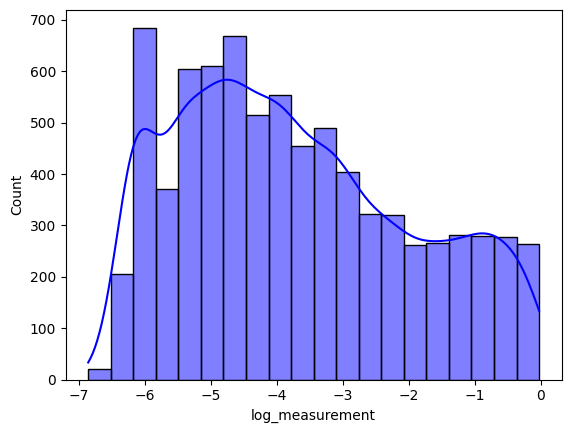

In [74]:
seaborn.histplot(
    data=df2,
    x="log_measurement",
    bins=20,
    kde=True,
    color="blue",
    alpha=0.5,
)

In [75]:
df

,OBJECTID,Oceans,Regions,SubRegions,Sampling Method,Measurement,Unit,Density Range,Density Class,Short Reference,Long Reference,DOI,Organization,Keywords,Accession Number,Accession Link,Latitude,Longitude,Date,GlobalID,x,y,yyyymmdd,year,month,day,measurement,log_measurement
0,9676,Atlantic Ocean,NaN,NaN,Grab sample,0.0180,pieces/m3,0.005-1,Medium,Barrows et al.2018,"Barrows, A.P.W., S.E. Cathey, C.W. Petersen. 2...",https://doi.org/10.1016/j.envpol.2018.02.062,Adventure Scientist,Adventure Scientist/Citizen Science,211009,https://www.ncei.noaa.gov/access/metadata/land...,-31.696000,-48.560000,8/11/2015 12:00:00 AM,a77121b2-e113-444e-82d9-7af11d62fdd2,-48.560000,-31.696000,2015-08-11,2015,8,11,0.0180,-4.017384
1,6427,Pacific Ocean,NaN,NaN,Neuston net,0.0000,pieces/m3,0-0.0005,Very Low,Law et al.2014,"Law, K.L, S.K. Morét-Ferguson, D.S. Goodwin, E...",https://doi.org/10.1021/es4053076,Sea Education Association,SEA,211008,https://www.ncei.noaa.gov/access/metadata/land...,6.350000,-121.850000,12/18/2002 12:00:00 AM,be27c450-02ca-4261-8d89-cae21108e6cc,-121.850000,6.350000,2002-12-18,2002,12,18,0.0000,-inf
2,10672,Pacific Ocean,NaN,NaN,Manta net,0.0130,pieces/m3,0.005-1,Medium,Goldstein et al.2013,"Goldstein, M.C., A.J. Titmus, M. Ford. 2013. S...",https://doi.org/10.1371/journal.pone.0080020,Scripps Institution of Oceanography-University...,Great Pacific Garbage Patch/SEAPLEX,253448,https://www.ncei.noaa.gov/access/metadata/land...,0.500000,-95.350000,10/17/2006 12:00:00 AM,23effcdd-35b7-4e1e-adb4-390693a287d3,-95.350000,0.500000,2006-10-17,2006,10,17,0.0130,-4.342806
3,13921,Atlantic Ocean,NaN,NaN,Aluminum bucket,1368.0000,pieces/m3,>=10,Very High,Queiroz et al.2022,"Queiroz, A.F.dos S., A.S. da Conceição, D. Che...",https://doi.org/10.1016/j.scitotenv.2022.156259,"Federal University of Pará, Brazil",Amazon Continental Shelf,276482,https://www.ncei.noaa.gov/access/metadata/land...,0.631825,-45.398158,10/17/2018 12:00:00 AM,16d77822-0533-4116-97b9-0bdb592f3d6e,-45.398158,0.631825,2018-10-17,2018,10,17,1.0000,0.000000
4,9344,Pacific Ocean,NaN,NaN,Grab sample,0.0010,pieces/m3,0.0005-0.005,Low,Barrows et al.2018,"Barrows, A.P.W., S.E. Cathey, C.W. Petersen. 2...",https://doi.org/10.1016/j.envpol.2018.02.062,Adventure Scientist,Adventure Scientist/Citizen Science,211009,https://www.ncei.noaa.gov/access/metadata/land...,16.623000,-99.697800,1/3/2015 12:00:00 AM,b9e435e3-9e86-4143-8b51-877e5dcdc7a6,-99.697800,16.623000,2015-01-03,2015,1,3,0.0010,-6.907755
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20418,7557,Pacific Ocean,NaN,NaN,Neuston net,0.0000,pieces/m3,0-0.0005,Very Low,Law et al.2014,"Law, K.L, S.K. Morét-Ferguson, D.S. Goodwin, E...",https://doi.org/10.1021/es4053076,Sea Education Association,SEA,211008,https://www.ncei.noaa.gov/access/metadata/land...,31.540000,-143.820000,7/6/2008 12:00:00 AM,86bb49ef-27c1-4cba-930a-796315290491,-143.820000,31.540000,2008-07-06,2008,7,6,0.0000,-inf
20419,9366,Atlantic Ocean,NaN,NaN,Grab sample,0.0110,pieces/m3,0.005-1,Medium,Barrows et al.2018,"Barrows, A.P.W., S.E. Cathey, C.W. Petersen. 2...",https://doi.org/10.1016/j.envpol.2018.02.062,Adventure Scientist,Adventure Scientist/Citizen Science,211009,https://www.ncei.noaa.gov/access/metadata/land...,17.100000,-47.550000,2/1/2015 12:00:00 AM,fd4db6d6-aed7-48b1-a22b-402557112e2f,-47.550000,17.100000,2015-02-01,2015,2,1,0.0110,-4.509860
20420,4683,Atlantic Ocean,Caribbean Sea,NaN,Neuston net,0.0216,pieces/m3,0.005-1,Medium,Law et al.2010,"Law, K.L., S. Morét-Ferguson, N.A. Maximenko, ...",https://doi.org/10.1126/science.1192321,Sea Education Association,SEA,211007,https://www.ncei.noaa.gov/access/metadata/land...,21.390000,-81.960000,3/14/2001 12:00:00 AM,83a8208e-2d06-4ad9-bcd9-81e29d57e0aa,-81.960000,21.390000,2001-03-14,2001,3,14,0.0216,-3.835062
20421,6043,Atlantic Ocean,NaN,NaN,Neuston net,0.0000,pieces/m3,0-0.0005,Very Low,Law et al.2010,"Law, K.L., S. Morét-Ferguson, 

In [76]:
(
    len(df),
    (df["log_measurement"] <= -7.).sum(),
    (df["log_measurement"] >= -0.03).sum()
)

(14612, 4612, 2050)

In [77]:
mean = df["measurement"].mean()
df["normed"] = (df["measurement"] - mean) / df["measurement"].std()

/tmp/ipykernel_216272/4258383233.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["normed"] = (df["measurement"] - mean) / df["measurement"].std()


<Axes: xlabel='normed', ylabel='Count'>

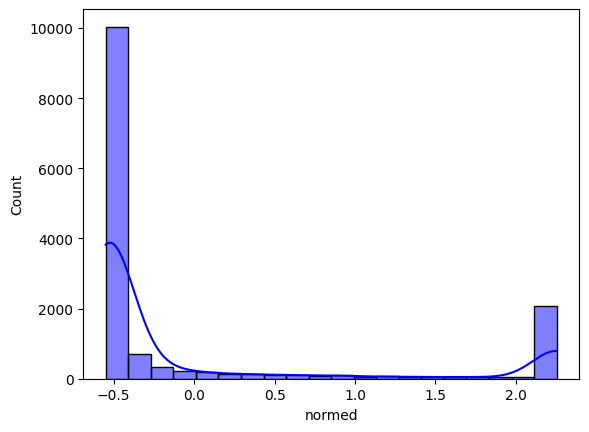

In [78]:
seaborn.histplot(
    data=df,
    x="normed",
    bins=20,
    kde=True,
    color="blue",
    alpha=0.5,
)

# Unit and Oceans observations

In [79]:
df['Unit'].unique()

array(['pieces/m3', 'pieces kg-1 d.w.'], dtype=object)

In [80]:
df.groupby("Unit").size().reset_index(name="count")

,Unit,count
0,pieces kg-1 d.w.,275
1,pieces/m3,14337


In [81]:
df.groupby('Oceans').size().reset_index(name="count")

,Oceans,count
0,Arctic Ocean,178
1,Atlantic Ocean,10064
2,Indian Ocean,17
3,Pacific Ocean,4353


In [82]:
df.groupby(['Oceans', 'year']).size().reset_index(name="count")

,Oceans,year,count
0,Arctic Ocean,2014,2
1,Arctic Ocean,2015,14
2,Arctic Ocean,2016,111
3,Arctic Ocean,2017,8
4,Arctic Ocean,2018,3
5,Arctic Ocean,2019,18
6,Arctic Ocean,2020,10
7,Arctic Ocean,2021,12
8,Atlantic Ocean,1986,20
9,Atlantic Ocean,1987,138


In [83]:
# m3_df.loc[:, ['Measurement', 'Oceans', 'Density Class', 'year']]

m3_df = df[
    (df['Unit'] == "pieces/m3") & (df["Oceans"].isin(['Atlantic Ocean', 'Pacific Ocean']))
].loc[:, ['measurement', 'Sampling Method', 'Density Class', 'year', 'Oceans']]
len(m3_df)

14142

In [84]:
m3_df.head()

,measurement,Sampling Method,Density Class,year,Oceans
0,0.018,Grab sample,Medium,2015,Atlantic Ocean
1,0.000,Neuston net,Very Low,2002,Pacific Ocean
2,0.013,Manta net,Medium,2006,Pacific Ocean
3,1.000,Aluminum bucket,Very High,2018,Atlantic Ocean
4,0.001,Grab sample,Low,2015,Pacific Ocean


In [85]:
m3_df['Sampling Method'].unique()

array(['Grab sample', 'Neuston net', 'Manta net', 'Aluminum bucket',
       'Intake seawater pump', 'PVC cylinder', 'Van Dorn sampler',
       'AVANI net', 'Plankton net', 'Hand picking',
       'Stainless steel spoon'], dtype=object)

In [86]:
m3_df.groupby(['Sampling Method', 'year']).size()

Sampling Method        year
AVANI net              2015     18
Aluminum bucket        2018     57
Grab sample            2013     34
                       2014    690
                       2015    267
                       2016    140
                       2017     16
Hand picking           2015     10
                       2016      8
Intake seawater pump   2015     76
                       2017     12
                       2018     44
Manta net              1987     23
                       1999      5
                       2000      6
                       2006      9
                       2009    119
                       2010     28
                       2011     63
                       2012     23
                       2013    125
                       2014    257
                       2015    622
                       2016     56
                       2017     97
                       2018    198
                       2019    284
                       2020

In [87]:
# TODO Re-categorize ```Sampling Method```, Manta net, Neuston net, Others

# Set Intervention for ```Pacific Ocean```

In [88]:
m3_df.groupby("Oceans").size()

Oceans
Atlantic Ocean    9789
Pacific Ocean     4353
dtype: int64

In [89]:
m3_df.groupby("Oceans").agg("measurement").mean()

Oceans
Atlantic Ocean    0.147545
Pacific Ocean     0.258282
Name: measurement, dtype: float64

In [90]:
m3_df["intervention"] = (m3_df['Oceans'] == "Pacific Ocean").apply(lambda x: int(x))
# m3_df["intervention"] = (m3_df['Oceans'] == "Atlantic Ocean").apply(lambda x: int(x))

In [97]:
edf = m3_df.loc[:, ['measurement', 'intervention', 'Sampling Method', 'Density Class', 'year']]
edf

,measurement,intervention,Sampling Method,Density Class,year
0,0.0180,0,Grab sample,Medium,2015
1,0.0000,1,Neuston net,Very Low,2002
2,0.0130,1,Manta net,Medium,2006
3,1.0000,0,Aluminum bucket,Very High,2018
4,0.0010,1,Grab sample,Low,2015
...,...,...,...,...,...
20418,0.0000,1,Neuston net,Very Low,2008
20419,0.0110,0,Grab sample,Medium,2015
20420,0.0216,0,Neuston net,Medium,2001
20421,0.0000,0,Neuston net,Very Low,2008


In [98]:
edf["neuston_net"] = (edf["Sampling Method"] == "Neuston net").apply(lambda x: int(x))

In [103]:
edf = edf.rename(columns={"Sampling Method": "sampling_method", "Density Class": "density"})
edf = edf.drop(columns=["sampling_method"])

In [104]:
edf.columns

Index(['measurement', 'intervention', 'density', 'year', 'neuston_net'], dtype='object')

In [105]:
df = edf

# Formula Definitions

In [139]:
y2t = "measurement ~ intervention"
y2covars = "measurement ~ intervention + C(density) + C(neuston_net) + year"
t2covars = "intervention ~ C(density) + C(neuston_net) + year"
covars = "C(density) + C(neuston_net) + year"

# Regression Analysis and Adjustment

In [106]:
smf.ols(y2t, data=edf).fit().summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,0.1475,0.003,42.996,0.000,0.141,0.154
intervention,0.1107,0.006,17.903,0.000,0.099,0.123


In [111]:
model = smf.ols(y2covars, data=edf).fit()
print("ATE:", model.params['intervention'])
print("95% CI::", model.conf_int().loc['intervention', :].values.T)

ATE: 0.03617097676768053
95% CI:: [0.0294542  0.04288776]


# Propensity Score Analysis

In [114]:
ps_model = smf.logit(t2covars, data=edf).fit(disp=0)

In [115]:
data_ps = edf.assign(
    propensity_score = ps_model.predict(edf)
)
data_ps[['intervention', 'measurement', 'propensity_score']].head()

,intervention,measurement,propensity_score
0,0,0.018,0.261603
1,1,0.000,0.344605
2,1,0.013,0.121578
3,0,1.000,0.235128
4,1,0.001,0.354619


In [116]:
model_p = smf.ols('measurement ~ intervention + propensity_score', data=data_ps).fit()
model_p.params['intervention']

0.03883745750633078

## Propensity Score Matching

In [117]:
from sklearn.neighbors import KNeighborsRegressor

T = "intervention"
X = "propensity_score"
Y = "measurement"

treated = data_ps.query(f"{T}==1")
untreated = data_ps.query(f"{T}==0")

mt0 = KNeighborsRegressor(n_neighbors=1).fit(untreated[[X]],
                                             untreated[Y])

mt1 = KNeighborsRegressor(n_neighbors=1).fit(treated[[X]], treated[Y])

predicted = pd.concat([
    # find matches for the treated looking at the untreated knn model
    treated.assign(match=mt0.predict(treated[[X]])),
    
    # find matches for the untreated looking at the treated knn model
    untreated.assign(match=mt1.predict(untreated[[X]]))
])

predicted.head()

,measurement,intervention,density,year,neuston_net,propensity_score,match
1,0.000000,1,Very Low,2002,1,0.344605,0.000000
2,0.013000,1,Medium,2006,0,0.121578,0.043196
4,0.001000,1,Low,2015,0,0.354619,0.001000
6,0.631646,1,Medium,2007,1,0.261648,0.007856
7,0.008640,1,Medium,2011,1,0.349855,0.814427


In [118]:
np.mean((predicted[Y] - predicted["match"])*predicted[T] 
        + (predicted["match"] - predicted[Y])*(1-predicted[T]))

0.12015437165888843

## Invertible-Prob. Weights

In [120]:
treatment = "intervention"
propscore = "propensity_score"
outcome = "measurement"

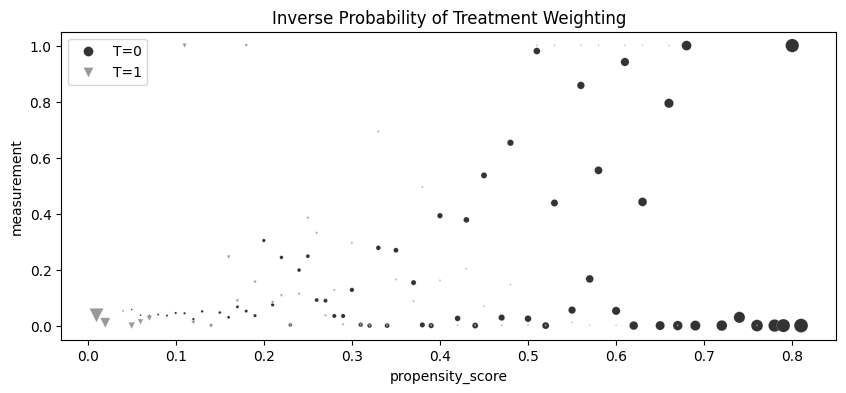

In [121]:
from cycler import cycler
color=['0.2', '0.6', '1.0']
default_cycler = (cycler(color=color))
linestyle=['-', '--', ':', '-.']
marker=['o', 'v', 'd', 'p']

g_data = (
    data_ps.assign(
        weight = data_ps["intervention"]/data_ps["propensity_score"] + (1-data_ps["intervention"])/(1-data_ps["propensity_score"]),
        propensity_score=data_ps["propensity_score"].round(2)
    ).groupby(
        ["propensity_score", "intervention"]
    )[["weight", outcome]].mean().reset_index()
)

plt.figure(figsize=(10,4))
for t in [0, 1]:
    seaborn.scatterplot(
        data=g_data.query(f"intervention=={t}"),
        y=outcome,
        x="propensity_score",
        size="weight",
        sizes=(1,100), color=color[t], legend=None, label=f"T={t}", marker=marker[t]
    )

plt.title("Inverse Probability of Treatment Weighting")
plt.legend()

In [123]:
weight_t = 1/data_ps.query("intervention==1")["propensity_score"]
weight_nt = 1/(1-data_ps.query("intervention==0")["propensity_score"])
t1 = data_ps.query("intervention==1")[outcome] 
t0 = data_ps.query("intervention==0")[outcome] 

y1 = sum(t1*weight_t)/len(data_ps)
y0 = sum(t0*weight_nt)/len(data_ps)

print("E[Y1]:", y1)
print("E[Y0]:", y0)
print("ATE", y1 - y0)

E[Y1]: 0.22340612519590397
E[Y0]: 0.18049709785404344
ATE 0.04290902734186053


In [124]:
np.mean(data_ps[outcome] 
        * (data_ps["intervention"] - data_ps["propensity_score"]) 
        / (data_ps["propensity_score"]*(1-data_ps["propensity_score"])))

0.042909027341861375

## variance of invertible-Pro. weight

In [125]:
from sklearn.linear_model import LogisticRegression
from patsy import dmatrix

# define function that computes the IPW estimator
def est_ate_with_ps(df, ps_formula, T, Y):
    
    X = dmatrix(ps_formula, df)
    ps_model = LogisticRegression(penalty=None,
                                  max_iter=1000).fit(X, df[T])
    ps = ps_model.predict_proba(X)[:, 1]
    
    # compute the ATE
    return np.mean((df[T]-ps) / (ps*(1-ps)) * df[Y]) 

In [140]:
# formula = """C(density) + year"""
formula = covars
T = treatment
Y = outcome

est_ate_with_ps(edf, formula, T, Y)

0.04302062834315918

In [141]:
from joblib import Parallel, delayed # for parallel processing

def bootstrap(data, est_fn, rounds=200, seed=123, pcts=[2.5, 97.5]):
    np.random.seed(seed)
    
    stats = Parallel(n_jobs=4)(
        delayed(est_fn)(data.sample(frac=1, replace=True))
        for _ in range(rounds)
    )
    
    return np.percentile(stats, pcts)

In [142]:
from toolz import partial

print(f"ATE: {est_ate_with_ps(edf, formula, T, Y)}")

est_fn = partial(est_ate_with_ps, ps_formula=formula, T=T, Y=Y)
print(f"95% C.I.: ", bootstrap(edf, est_fn))

ATE: 0.04302062834315918
95% C.I.:  [0.03585953 0.05118308]


## stable propensity score weight

In [143]:

print("Original Sample Size", data_ps.shape[0])
print("Treated Pseudo-Population Sample Size", sum(weight_t))
print("Untreated Pseudo-Population Sample Size", sum(weight_nt))

Original Sample Size 14142
Treated Pseudo-Population Sample Size 16296.907563106268
Untreated Pseudo-Population Sample Size 14412.131130656759


In [144]:
p_of_t = data_ps["intervention"].mean()

t1 = data_ps.query("intervention==1")
t0 = data_ps.query("intervention==0")

weight_t_stable = p_of_t/t1["propensity_score"]
weight_nt_stable = (1-p_of_t)/(1-t0["propensity_score"])

print("Treat size:", len(t1))
print("W treat", sum(weight_t_stable))

print("Control size:", len(t0))
print("W treat", sum(weight_nt_stable))

Treat size: 4353
W treat 5016.294627506889
Control size: 9789
W treat 9975.983003676714


In [145]:
nt = len(t1)
nc = len(t0)

y1 = sum(t1[outcome]*weight_t_stable)/nt
y0 = sum(t0[outcome]*weight_nt_stable)/nc

print("ATE: ", y1 - y0)

ATE:  0.04290902734186111


## Pseudo population

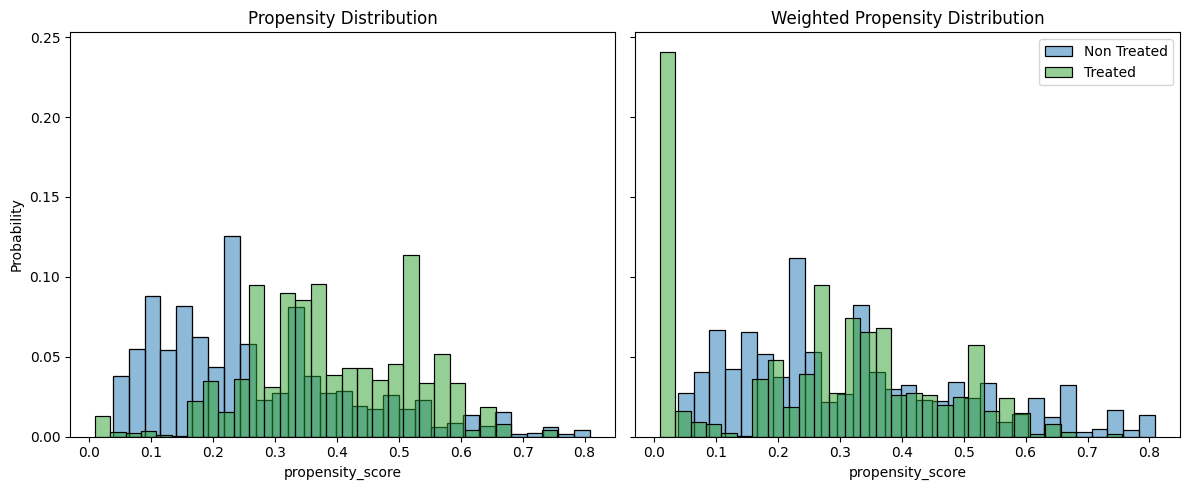

In [146]:
import seaborn as sns

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5), sharex=True, sharey=True)

sns.histplot(data_ps.query("intervention==0")["propensity_score"], stat="probability",
             label="Not Treated", color="C0", alpha=0.5, ax=ax1, bins=30)
sns.histplot(data_ps.query("intervention==1")["propensity_score"], stat="probability",
             label="Treated", color="C2", alpha=0.5, ax=ax1, bins=30)
ax1.set_title("Propensity Distribution")

sns.histplot(data_ps.query("intervention==0").assign(w=weight_nt_stable),
             x="propensity_score", stat="probability",
             color="C0", weights="w", label="Non Treated", alpha=0.5, ax=ax2, bins=30)

sns.histplot(data_ps.query("intervention==1").assign(w=weight_t_stable),
             x="propensity_score", stat="probability",
             color="C2", weights="w", label="Treated", alpha=0.5, ax=ax2, bins=30)
ax2.set_title("Weighted Propensity Distribution")
plt.legend()

plt.tight_layout()

## Positivity Assumption of Propensity Score

In [147]:
np.random.seed(1)

n = 1000
x = np.random.normal(0, 1, n)
t = np.random.normal(x, 0.5, n) > 0

y0 = -x
y1 = y0 + t  # ate of 1

y = np.random.normal((1-t)*y0 + t*y1, 0.2)

df_no_pos = pd.DataFrame(dict(x=x,t=t.astype(int),y=y))

df_no_pos.head()

,x,t,y
0,1.624345,1,-0.526442
1,-0.611756,0,0.659516
2,-0.528172,0,0.438549
3,-1.072969,0,0.950810
4,0.865408,1,-0.271397


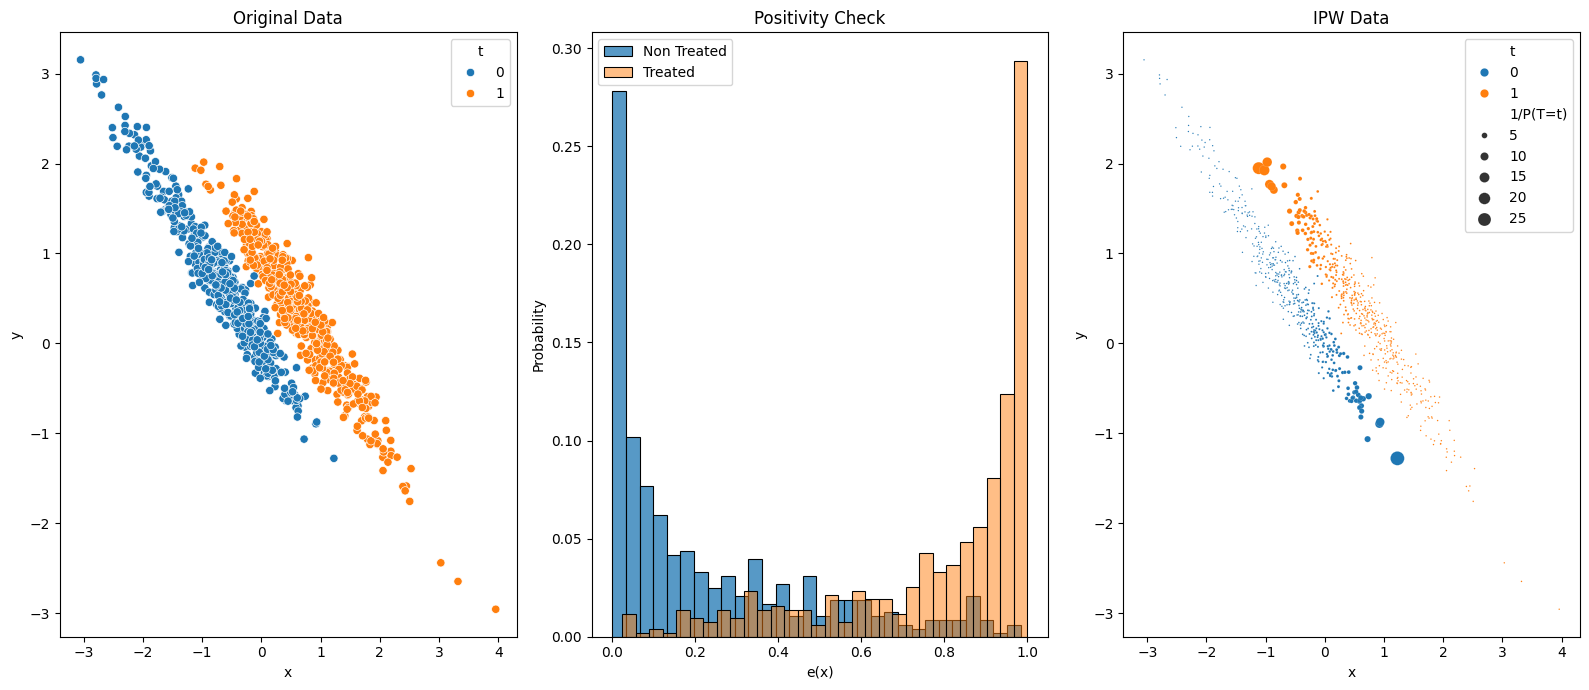

In [148]:
ps_model_sim = smf.logit("""t ~ x""", data=df_no_pos).fit(disp=0)
df_no_pos_ps = df_no_pos.assign(ps=ps_model_sim.predict(df_no_pos))

ps = ps_model_sim.predict(df_no_pos)
w = df_no_pos["t"]*df_no_pos["t"].mean()/ps  + (1-df_no_pos["t"])*((1-df_no_pos["t"].mean())/(1-ps))

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16,7))

sns.scatterplot(data=df_no_pos_ps.assign(w=w), x="x", y="y", hue="t", ax=ax1);
ax1.set_title("Original Data")

sns.histplot(df_no_pos_ps.query("t==0")["ps"], stat="probability",
             label="Non Treated", color="C0", bins=30, ax=ax2)
sns.histplot(df_no_pos_ps.query("t==1")["ps"], stat="probability",
             label="Treated", color="C1", alpha=0.5, bins=30, ax=ax2)
ax2.set_xlabel("e(x)")
ax2.legend()
ax2.set_title("Positivity Check")

sns.scatterplot(data=df_no_pos_ps.assign(**{"1/P(T=t)":w}), x="x", y="y", hue="t", ax=ax3, size="1/P(T=t)", sizes=(1, 100));
ax3.set_title("IPW Data")

plt.tight_layout()

In [149]:
np.random.seed(1)

n = len(edf)
x = edf["year"]
t = edf[treatment]

y = edf[outcome]

df_no_pos = pd.DataFrame(dict(x=x,t=t.astype(int),y=y))

df_no_pos.head()

,x,t,y
0,2015,0,0.018
1,2002,1,0.000
2,2006,1,0.013
3,2018,0,1.000
4,2015,1,0.001


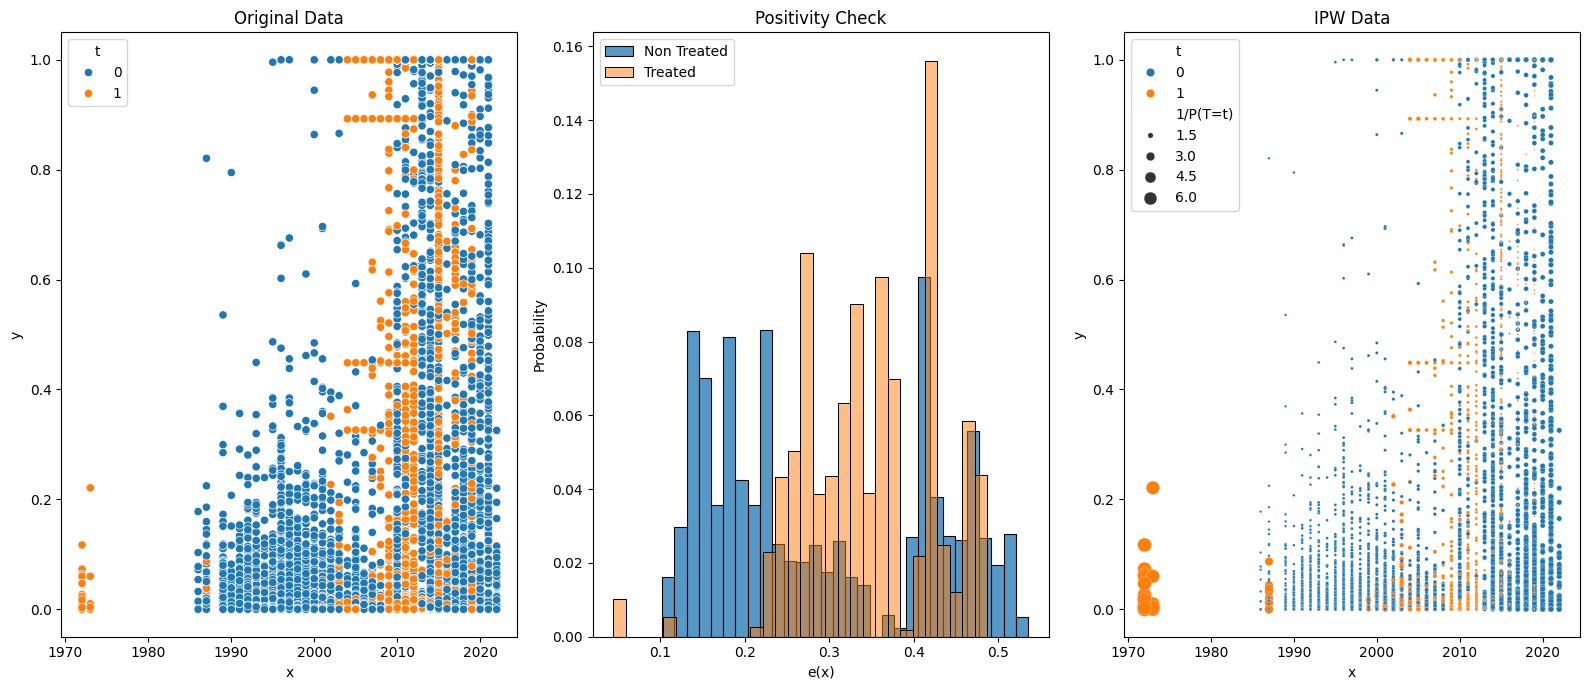

In [150]:
ps_model_sim = smf.logit("""t ~ x""", data=df_no_pos).fit(disp=0)
df_no_pos_ps = df_no_pos.assign(ps=ps_model_sim.predict(df_no_pos))

ps = ps_model_sim.predict(df_no_pos)
w = df_no_pos["t"]*df_no_pos["t"].mean()/ps  + (1-df_no_pos["t"])*((1-df_no_pos["t"].mean())/(1-ps))

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16,7))

sns.scatterplot(data=df_no_pos_ps.assign(w=w), x="x", y="y", hue="t", ax=ax1);
ax1.set_title("Original Data")

sns.histplot(df_no_pos_ps.query("t==0")["ps"], stat="probability",
             label="Non Treated", color="C0", bins=30, ax=ax2)
sns.histplot(df_no_pos_ps.query("t==1")["ps"], stat="probability",
             label="Treated", color="C1", alpha=0.5, bins=30, ax=ax2)
ax2.set_xlabel("e(x)")
ax2.legend()
ax2.set_title("Positivity Check")

sns.scatterplot(data=df_no_pos_ps.assign(**{"1/P(T=t)":w}), x="x", y="y", hue="t", ax=ax3, size="1/P(T=t)", sizes=(1, 100));
ax3.set_title("IPW Data")

plt.tight_layout()

# Doubled Robustnedd Estimation

In [151]:
from sklearn.linear_model import LinearRegression

def doubly_robust(df, formula, T, Y):
    X = dmatrix(formula, df)
    
    ps_model = LogisticRegression(penalty=None,
                                  max_iter=1000).fit(X, df[T])
    ps = ps_model.predict_proba(X)[:, 1]
    
    m0 = LinearRegression().fit(X[df[T]==0, :], df.query(f"{T}==0")[Y])
    m1 = LinearRegression().fit(X[df[T]==1, :], df.query(f"{T}==1")[Y])
    
    m0_hat = m0.predict(X)
    m1_hat = m1.predict(X)

    return (
        np.mean(df[T]*(df[Y] - m1_hat)/ps + m1_hat) -
        np.mean((1-df[T])*(df[Y] - m0_hat)/(1-ps) + m0_hat)
    )

In [152]:
formula = """C(density) + year"""
T = treatment
Y = outcome

print("DR ATE:", doubly_robust(df, formula, T, Y))

est_fn = partial(doubly_robust, formula=formula, T=T, Y=Y)
print("95% CI", bootstrap(df, est_fn))

DR ATE: 0.04000539843341375
95% CI [0.03070713 0.04876616]
